In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("Screentime - App Details.csv")

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Print basic information about the data
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df.columns)

        Date  Usage  Notifications  TimesOpened        App
0 2024-02-01     40             70           50  Instagram
1 2024-02-02     36             52           50  Instagram
2 2024-02-03     63            237           57  Instagram
3 2024-02-04     16             37           25  Instagram
4 2024-02-05      5             22            7  Instagram
Date             0
Usage            0
Notifications    0
TimesOpened      0
App              0
dtype: int64
                      Date       Usage  Notifications  TimesOpened
count                  108  108.000000     108.000000   108.000000
mean   2024-02-14 00:00:00   56.120370      91.259259    47.870370
min    2024-02-01 00:00:00    3.000000      10.000000     4.000000
25%    2024-02-07 00:00:00   25.000000      35.000000    20.750000
50%    2024-02-14 00:00:00   45.000000      65.000000    37.500000
75%    2024-02-21 00:00:00   73.000000     122.500000    69.250000
max    2024-02-27 00:00:00  246.000000     409.000000   194.000000
st

In [2]:
# Find the app with the most unlocks and related notifications
most_unlocks = df['TimesOpened'].max()
corelated_notifications = df.loc[df['TimesOpened'] == most_unlocks, 'Notifications'].iloc[0]
print("No. of times user got notifications = ", corelated_notifications)
print("Max number of unlocks to their phone =", most_unlocks)

# Find the app with the most notifications and related unlocks
most_notifications = df['Notifications'].max()
corelated_unlocks = df.loc[df['Notifications'] == most_notifications, 'TimesOpened'].iloc[0]
print("No. of times user unlocked phone = ", corelated_unlocks)
print("No. of max notifications =", most_notifications)


No. of times user got notifications =  409
Max number of unlocks to their phone = 194
No. of times user unlocked phone =  194
No. of max notifications = 409


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2968\3093732280.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.plot(subplots=True, ax=plt.gca())


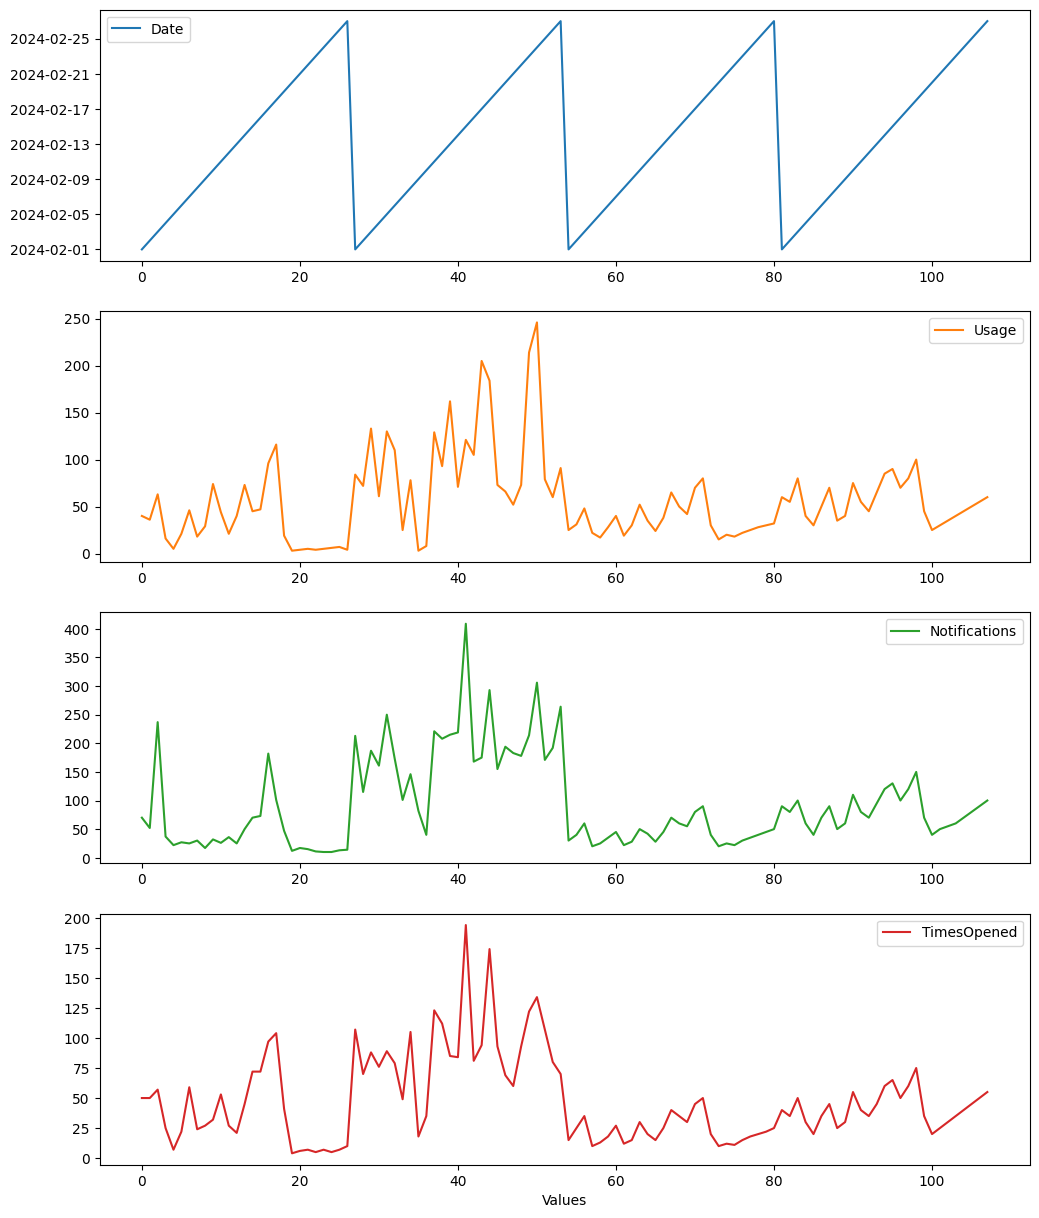

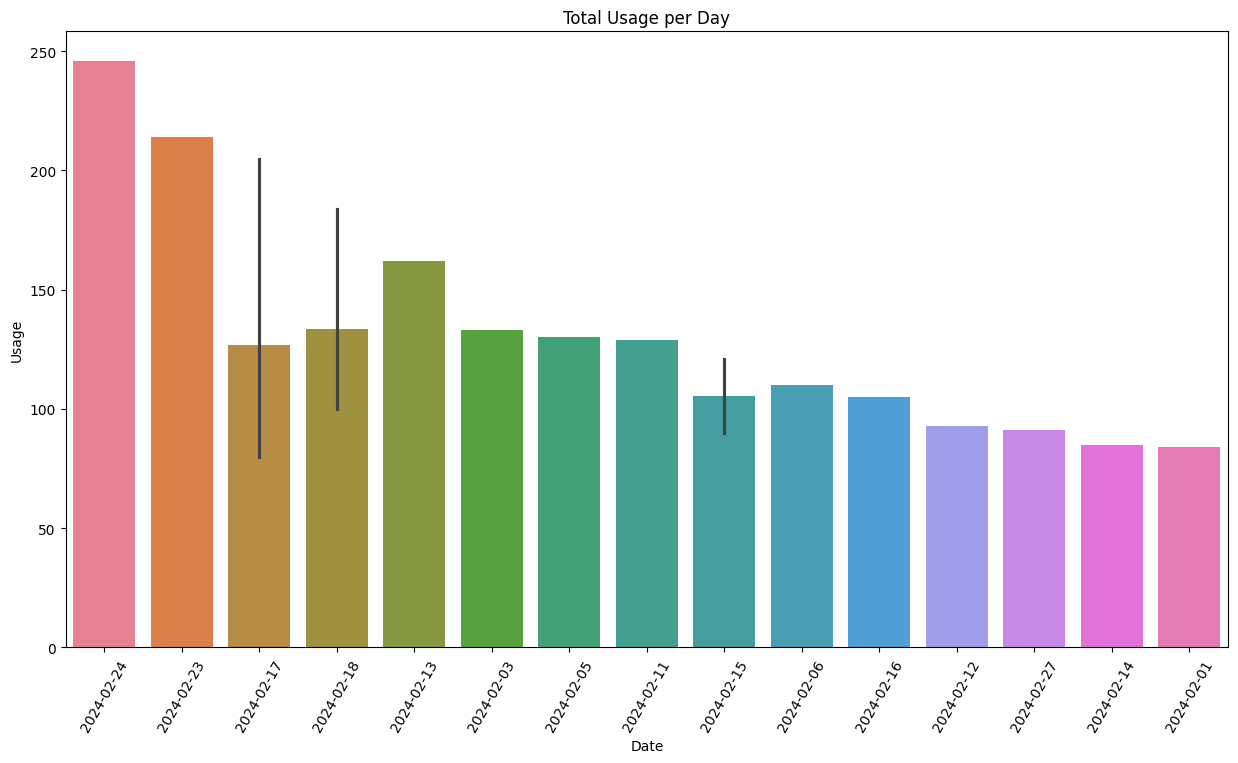

In [3]:
# Visualize data using line plots
plt.figure(figsize=(12, 15))
df.plot(subplots=True, ax=plt.gca())
plt.xlabel('Values')
plt.show()

# Sort data by 'Usage' and plot top 20
sorted_df = df.sort_values(by=['Usage'], ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x='Date', y='Usage', data=sorted_df.head(20), hue='Date', legend=False)
plt.xticks(rotation=60)
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title('Total Usage per Day')
plt.show()


In [4]:
# Find app opened max times
max_times = df['TimesOpened'].max()
used_app = df.loc[df['TimesOpened'] == max_times, 'App'].iloc[0]
print(used_app, 'was opened max times ~', max_times, 'times')

# Find app with maximum usage
max_usage = df['Usage'].max()
_app = df.loc[df['Usage'] == max_usage, 'App'].iloc[0]
print(_app, 'had maximum usage ~', max_usage)

# Find app with max notifications and least notifications
max_notification = df['Notifications'].max()
u_app = df.loc[df['Notifications'] == max_notification, 'App'].iloc[0]
print(u_app, 'had max notifications ~', max_notification)

min_notification = df['Notifications'].min()
us_app = df.loc[df['Notifications'] == min_notification, 'App'].iloc[0]
print(us_app, 'had least notifications ~', min_notification)


WhatsApp was opened max times ~ 194 times
WhatsApp had maximum usage ~ 246
WhatsApp had max notifications ~ 409
Instagram had least notifications ~ 10


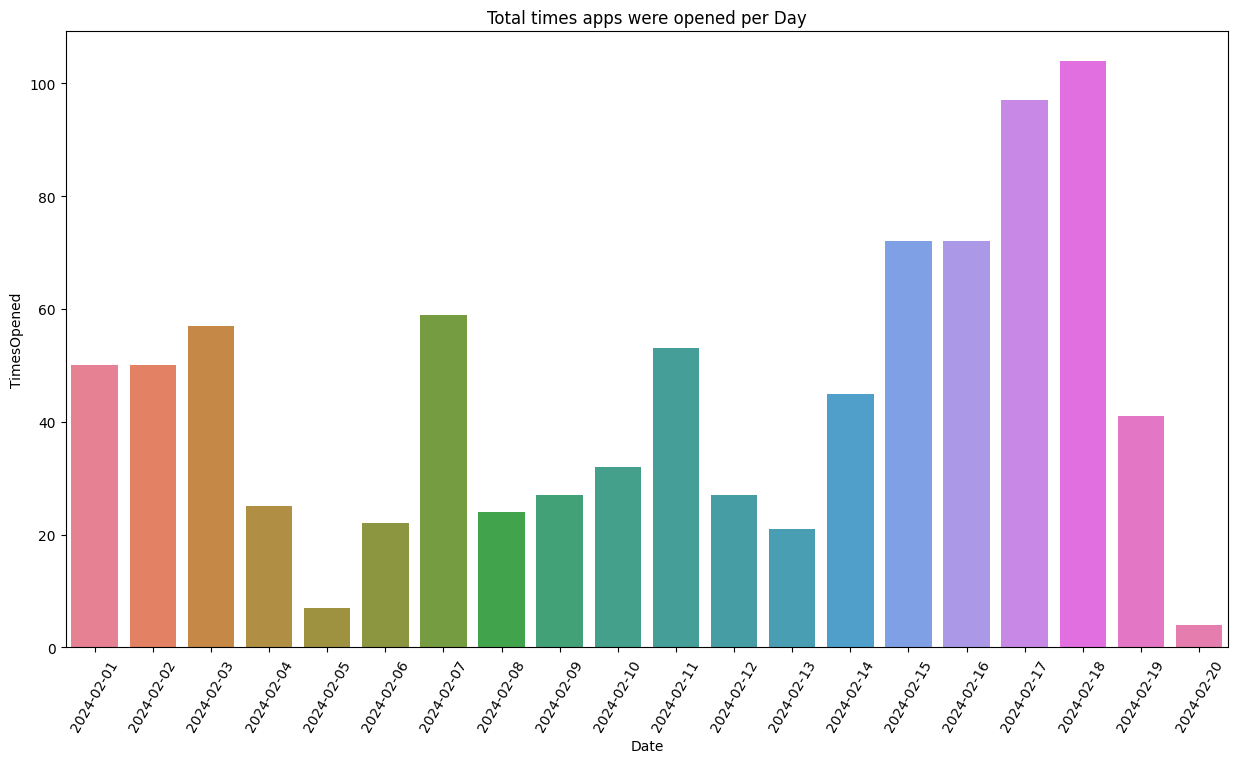

In [5]:
# Plot total times apps were opened per day
plt.figure(figsize=(15, 8))
sns.barplot(x='Date', y='TimesOpened', data=df.head(20), hue='Date', legend=False)
plt.xticks(rotation=60)
plt.ylabel('TimesOpened')
plt.xlabel('Date')
plt.title('Total times apps were opened per Day')
plt.show()


In [6]:
# Count occurrences of Instagram and WhatsApp and check if they are the same
instagram_count = (df['App'] == 'Instagram').sum()
whatsapp_count = (df['App'] == 'WhatsApp').sum()

print("Number of occurrences for Instagram:", instagram_count)
print("Number of occurrences for WhatsApp:", whatsapp_count)

if instagram_count == whatsapp_count:
    print("The number of occurrences for Instagram and WhatsApp is the same.")
else:
    print("The number of occurrences for Instagram and WhatsApp is not the same.")


Number of occurrences for Instagram: 27
Number of occurrences for WhatsApp: 27
The number of occurrences for Instagram and WhatsApp is the same.


In [7]:
# Feature Engineering
# Create 'Weekday' and 'Weekend' features
df['Weekday'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Weekend'] = df['Weekday'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if weekday

# Calculate average usage per day for each app
avg_usage_per_day = df.groupby(['App', 'Date']).agg({'Usage': 'sum'}).reset_index().groupby('App')['Usage'].mean()
df['AvgUsagePerDay'] = df['App'].map(avg_usage_per_day)

# Calculate average usage per session for each app
df['AvgUsagePerSession'] = df['Usage'] / df['TimesOpened']


In [8]:
# Session Length
df['SessionLength'] = df['Usage'] / 60  # Convert seconds to minutes

# Interactions
df['Interactions'] = df['TimesOpened'] + df['Notifications']

# Daily Trends
df['DailyUsageTrend'] = df.groupby('Date')['Usage'].transform('mean')

# Weekday vs. Weekend Usage
df['Weekday'] = df['Date'].dt.dayofweek < 5  # Weekday: True, Weekend: False

# User Engagement Score
df['EngagementScore'] = (df['Usage'] + df['Interactions'] + df['SessionLength']) / 3


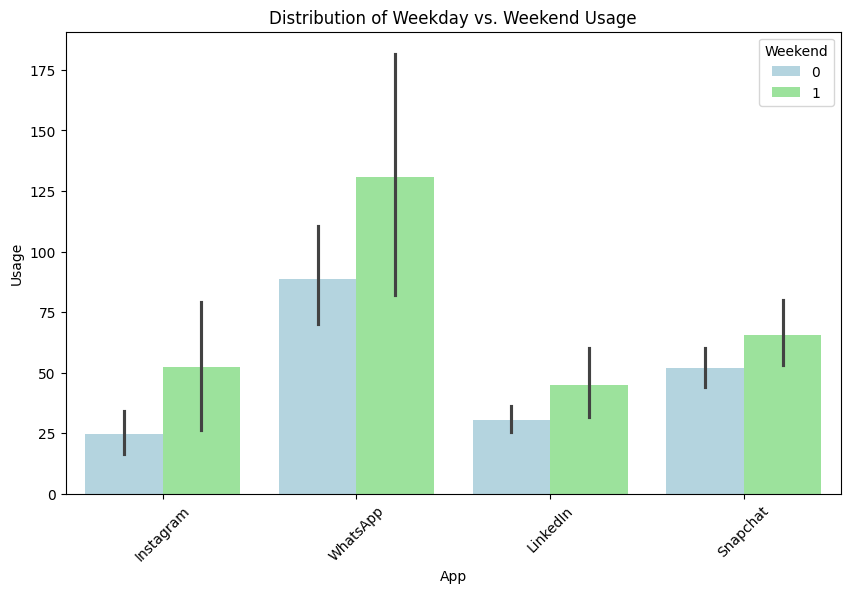

In [9]:
# Visualization of Feature Engineering

# Distribution of Weekday vs. Weekend Usage
plt.figure(figsize=(10, 6))
sns.barplot(x='App', y='Usage', hue='Weekend', data=df, palette={0: 'lightblue', 1: 'lightgreen'})
plt.title('Distribution of Weekday vs. Weekend Usage')
plt.xlabel('App')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.legend(title='Weekend', loc='upper right')
plt.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_2968\2017334382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='App', y='AvgUsagePerDay', data=df, palette='viridis')


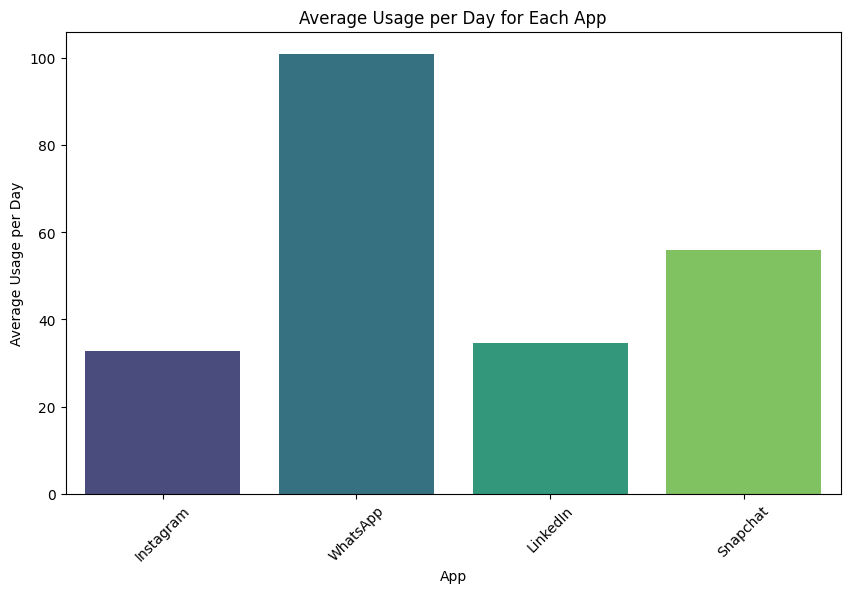

In [10]:
# Average Usage per Day
plt.figure(figsize=(10, 6))
sns.barplot(x='App', y='AvgUsagePerDay', data=df, palette='viridis')
plt.title('Average Usage per Day for Each App')
plt.xlabel('App')
plt.ylabel('Average Usage per Day')
plt.xticks(rotation=45)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


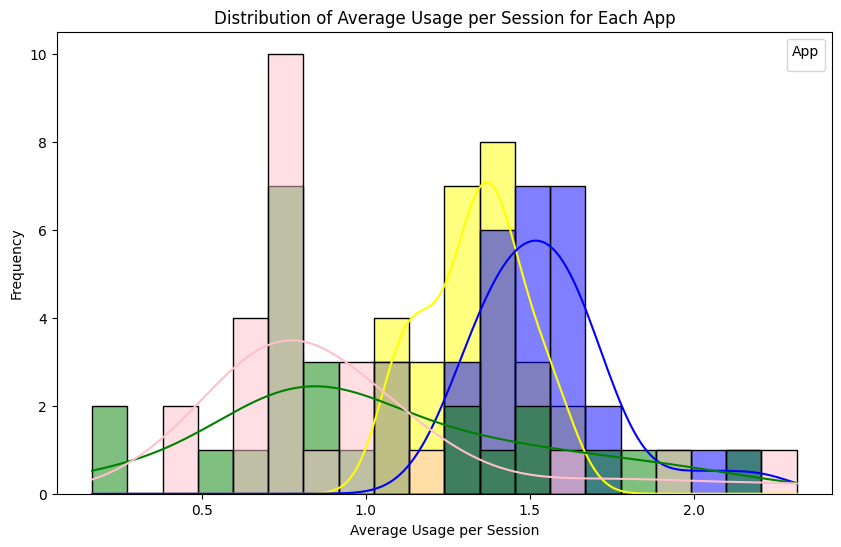

In [11]:
# Average Usage per Session
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AvgUsagePerSession', hue='App', bins=20, kde=True, palette={'Instagram': 'pink', 'WhatsApp': 'green', 'Snapchat': 'yellow', 'LinkedIn': 'blue'})
plt.title('Distribution of Average Usage per Session for Each App')
plt.xlabel('Average Usage per Session')
plt.ylabel('Frequency')
plt.legend(title='App')
plt.show()


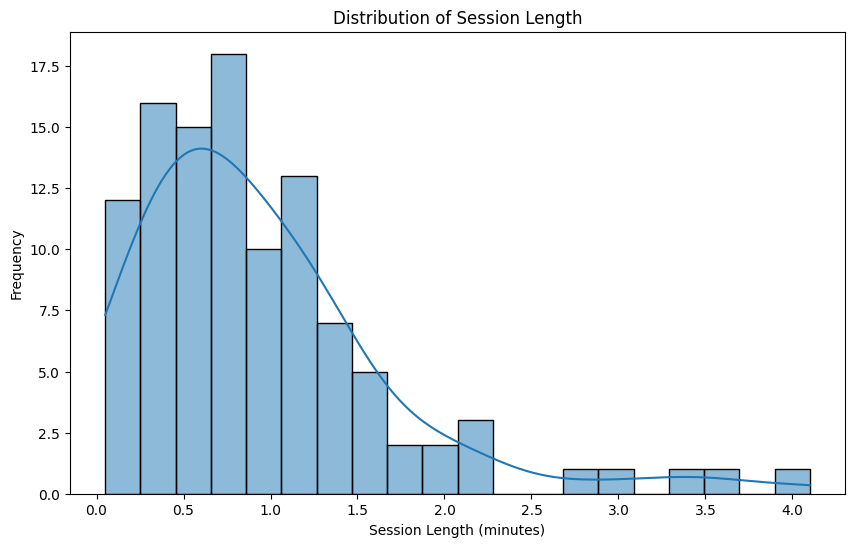

In [12]:
# Session Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SessionLength', bins=20, kde=True)
plt.title('Distribution of Session Length')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.show()



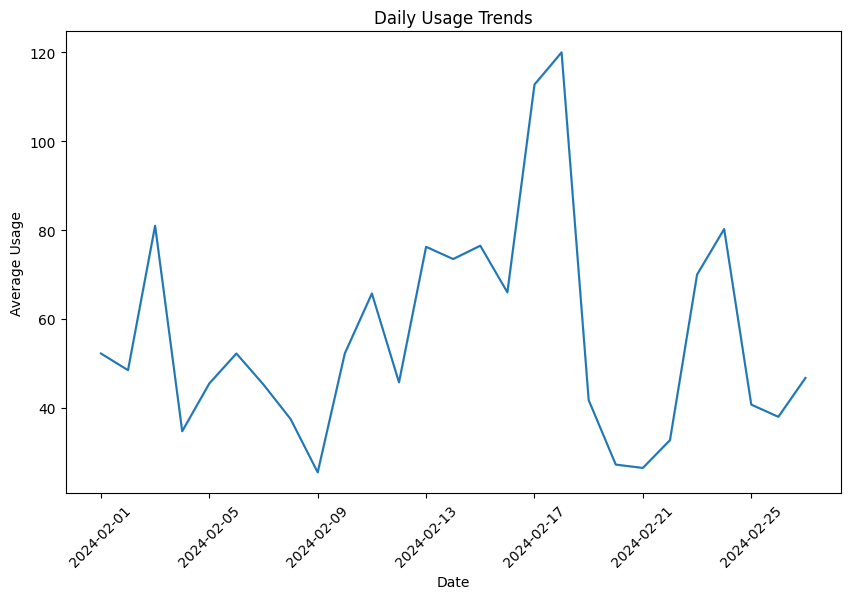

In [13]:
# Daily Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='DailyUsageTrend', data=df, estimator='mean')
plt.title('Daily Usage Trends')
plt.xlabel('Date')
plt.ylabel('Average Usage')
plt.xticks(rotation=45)
plt.show()


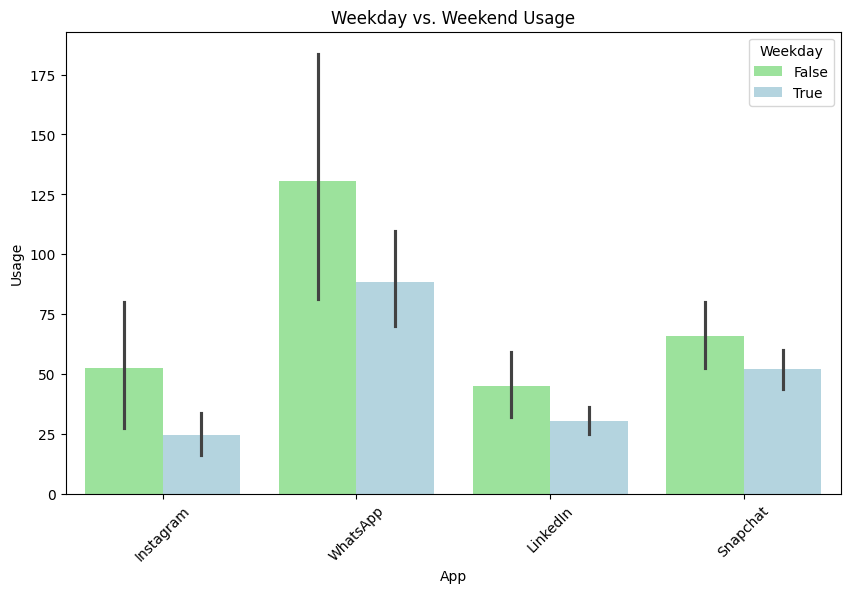

In [14]:
# Weekday vs. Weekend Usage
plt.figure(figsize=(10, 6))
sns.barplot(x='App', y='Usage', hue='Weekday', data=df, palette={True: 'lightblue', False: 'lightgreen'})
plt.title('Weekday vs. Weekend Usage')
plt.xlabel('App')
plt.ylabel('Usage')
plt.xticks(rotation=45)
plt.legend(title='Weekday')
plt.show()


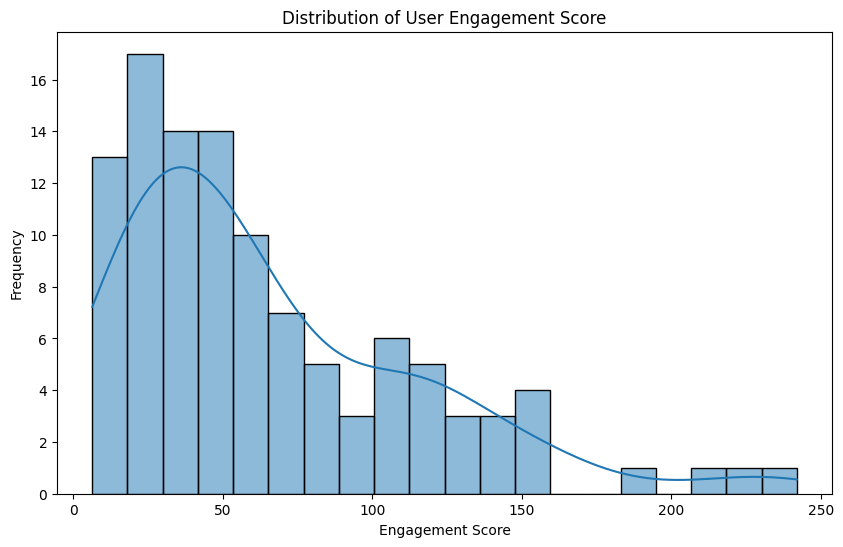

In [15]:
# User Engagement Score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EngagementScore', bins=20, kde=True)
plt.title('Distribution of User Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


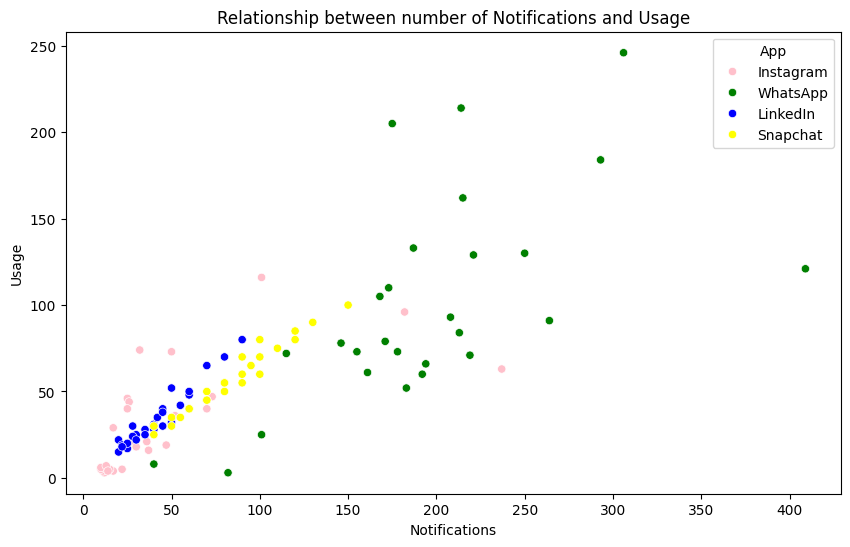

In [16]:
# Plot relationship between Notifications and Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Notifications", y="Usage", hue="App", palette={'Instagram': 'pink', 'WhatsApp': 'green', 'Snapchat': 'yellow', 'LinkedIn': 'blue'})
plt.title("Relationship between number of Notifications and Usage")
plt.show()


In [17]:
# Perform User Segmentation
# Select relevant features for clustering
X = df[['Usage', 'TimesOpened', 'Notifications']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cluster_names = {
    0: 'Low Usage',
    1: 'Moderate Usage',
    2: 'High Usage'
}


# Determine optimal number of clusters using elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

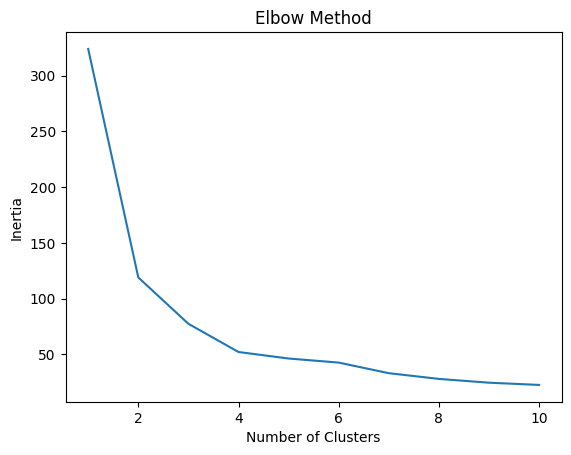

                     Usage  TimesOpened  Notifications
Cluster                                               
High Usage       78.843750    74.562500     149.843750
Low Usage       173.875000   126.875000     260.375000
Moderate Usage   31.573529    26.014706      43.794118


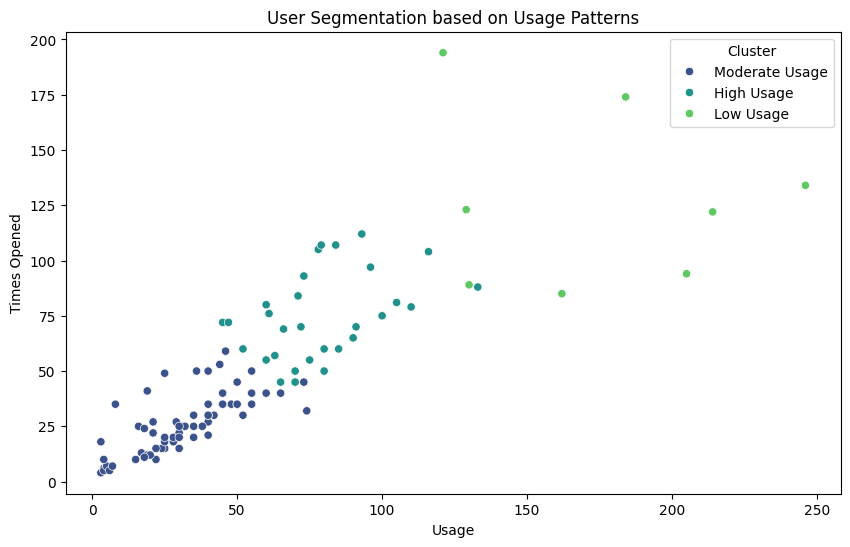

In [18]:
# Plot elbow method to visualize optimal number of clusters
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, select the optimal number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Convert cluster labels to meaningful names
df['Cluster'] = df['Cluster'].map(cluster_names)

# Analyze differences in usage behavior between user segments
cluster_analysis = df.groupby('Cluster')[['Usage', 'TimesOpened', 'Notifications']].mean()
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usage', y='TimesOpened', hue='Cluster', palette='viridis')
plt.title('User Segmentation based on Usage Patterns')
plt.xlabel('Usage')
plt.ylabel('Times Opened')
plt.legend(title='Cluster')
plt.show()
